In [237]:
from ogb.nodeproppred import PygNodePropPredDataset
from torch_geometric.data import DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [44]:
dataset = PygNodePropPredDataset(name = "ogbn-mag")

/zhome/a6/2/155003/deep_learning/final_project/project_venv/lib/python3.11/site-packages/ogb/nodeproppred/dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  se

In [58]:
split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]
graph = dataset[0]
graph

Data(
  num_nodes_dict={
    author=1134649,
    field_of_study=59965,
    institution=8740,
    paper=736389,
  },
  edge_index_dict={
    (author, affiliated_with, institution)=[2, 1043998],
    (author, writes, paper)=[2, 7145660],
    (paper, cites, paper)=[2, 5416271],
    (paper, has_topic, field_of_study)=[2, 7505078],
  },
  x_dict={ paper=[736389, 128] },
  node_year={ paper=[736389, 1] },
  edge_reltype={
    (author, affiliated_with, institution)=[1043998, 1],
    (author, writes, paper)=[7145660, 1],
    (paper, cites, paper)=[5416271, 1],
    (paper, has_topic, field_of_study)=[7505078, 1],
  },
  y_dict={ paper=[736389, 1] }
)

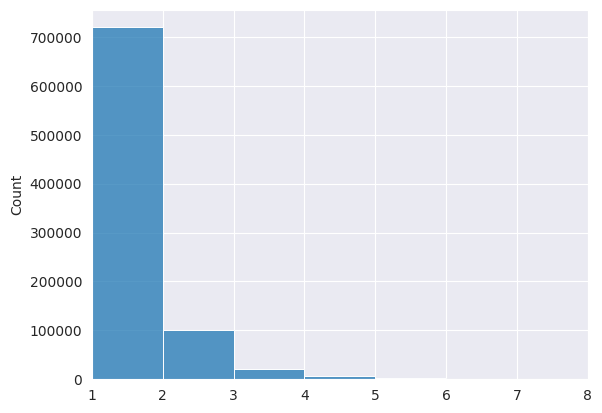

In [251]:
df1 = pd.DataFrame(graph.edge_index_dict[('author', 'affiliated_with', 'institution')].numpy()).transpose()
auth_inst = df1.groupby(0).count().to_numpy()[:, -1]

df2 = pd.DataFrame(graph.edge_index_dict[('author', 'writes', 'paper')].numpy()).transpose()
auth_pap = df2.groupby(0).count().to_numpy()[:, -1]

sns.histplot(auth_inst, binwidth=1)
plt.xlim(1, 8)
plt.show()

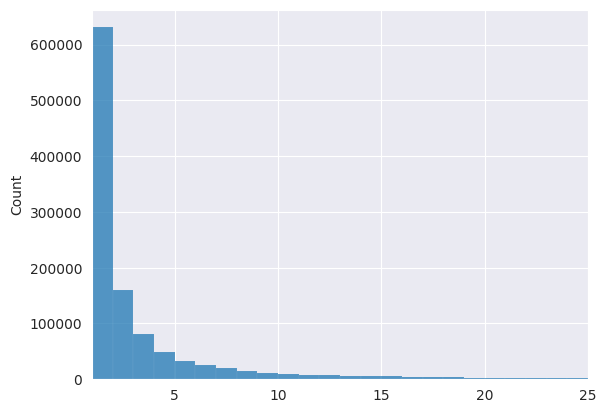

In [256]:
sns.histplot(auth_pap, binwidth=1)
plt.xlim(1, 25)
plt.show()

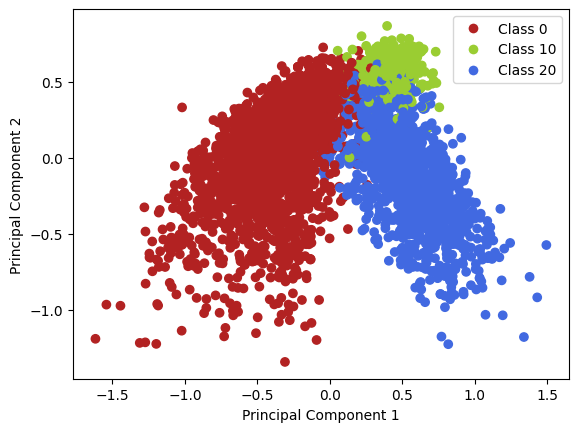

In [167]:
classes = [0, 10, 20]

y = graph.y_dict['paper'].numpy()[:, -1]
y_indices = np.array([e in classes for e in y])
y_indexed = y[y_indices]
x = graph.x_dict['paper'].numpy()
x_indexed = x[y_indices]

pca = PCA(n_components=2)
components = pca.fit_transform(x_indexed)

# Plotting
colors = ['firebrick', 'yellowgreen', 'royalblue']  # Adjust or expand colors to match the number of unique classes
color_dict = {cls: colors[i] for i, cls in enumerate(classes)}
colormap = [color_dict[label] for label in y_indexed]

plt.scatter(components[:, 0], components[:, 1], c=colormap)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[cls], markersize=8, label=f'Class {cls}')
           for cls in classes]
plt.legend(handles=handles)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()